In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [172]:
df = pd.read_csv(r'D:\AI DS Diploma\Data Analysis\Uber Request Data.csv')

In [173]:
df['Request_timestamp'] = pd.to_datetime(df['Request_timestamp'], format='mixed', dayfirst=True)
df['Drop_timestamp'] = pd.to_datetime(df['Drop_timestamp'], format='mixed', dayfirst=True)

df['Request_timestamp'] = df['Request_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['Drop_timestamp'] = df['Drop_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
print(df[['Request_timestamp', 'Drop_timestamp']].tail(10))


        Request_timestamp Drop_timestamp
6735  2016-07-15 23:39:15            NaN
6736  2016-07-15 23:42:51            NaN
6737  2016-07-15 23:43:54            NaN
6738  2016-07-15 23:46:03            NaN
6739  2016-07-15 23:46:20            NaN
6740  2016-07-15 23:49:03            NaN
6741  2016-07-15 23:50:05            NaN
6742  2016-07-15 23:52:06            NaN
6743  2016-07-15 23:54:39            NaN
6744  2016-07-15 23:55:03            NaN


In [174]:
df.loc[df['Drop_timestamp'].isna(), 'Drop_timestamp'] = df.loc[df['Drop_timestamp'].isna(), 'Request_timestamp']
print(df[['Request_timestamp', 'Drop_timestamp']].tail(10))

        Request_timestamp       Drop_timestamp
6735  2016-07-15 23:39:15  2016-07-15 23:39:15
6736  2016-07-15 23:42:51  2016-07-15 23:42:51
6737  2016-07-15 23:43:54  2016-07-15 23:43:54
6738  2016-07-15 23:46:03  2016-07-15 23:46:03
6739  2016-07-15 23:46:20  2016-07-15 23:46:20
6740  2016-07-15 23:49:03  2016-07-15 23:49:03
6741  2016-07-15 23:50:05  2016-07-15 23:50:05
6742  2016-07-15 23:52:06  2016-07-15 23:52:06
6743  2016-07-15 23:54:39  2016-07-15 23:54:39
6744  2016-07-15 23:55:03  2016-07-15 23:55:03


In [175]:
# Ensure both columns are datetime (if not already)
df['Request_timestamp'] = pd.to_datetime(df['Request_timestamp'], format='mixed', dayfirst=True)
df['Drop_timestamp'] = pd.to_datetime(df['Drop_timestamp'], format='mixed', dayfirst=True)

# Calculate Trip_duration
df['Trip_duration'] = ((df['Drop_timestamp'] - df['Request_timestamp']).dt.total_seconds() / 3600).round(2)
df['Trip_duration']
df

Request_id Pickup_point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request_timestamp      Drop_timestamp  Trip_duration  
0    2016-07-11 11:51:00 2016-07-11 13:00:00           1.15  
1    2016-07-11 17:57:00 2016-07-11 18:47:00           0.83  
2    2016-07-12 09:17:00 2016-07-12 09:58:00           0.68  
3    2016-07-12 21:08:00 2016-07-12 22:03:00           0.92  
4    2016-07-13 08:33:16 2016-07-13 09:25:47           0.88  
...                  ...                 ...            ...  
6740 2016-07-15 23:49:03 2016-07-15 23:49:03           0.00  
6741 2016-07-15 23:50:05 2016-07-15 23:50:05           0.00  
6742 2016-07-15 23:52:06 2016-07-15 23:52:06           0.00  
6743 2016-07-15 23:54:39 2016-07-15 23:54:39           0.00  
6744 2016-07-15 23:55:03 2016-07-15 23:55:03           0.00  

[6745 rows x 7 columns]

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   datetime64[ns]
 5   Drop_timestamp     6745 non-null   datetime64[ns]
 6   Trip_duration      6745 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 369.0+ KB


In [177]:
df.loc[df['Driver id'].isna(), 'Driver id'] = 0

In [178]:
df.tail(10)

Request_id Pickup_point  Driver id             Status  \
6735        6737      Airport        0.0  No Cars Available   
6736        6744      Airport        0.0  No Cars Available   
6737        6740         City        0.0  No Cars Available   
6738        6746         City        0.0  No Cars Available   
6739        6739         City        0.0  No Cars Available   
6740        6745         City        0.0  No Cars Available   
6741        6752      Airport        0.0  No Cars Available   
6742        6751         City        0.0  No Cars Available   
6743        6754         City        0.0  No Cars Available   
6744        6753      Airport        0.0  No Cars Available   

       Request_timestamp      Drop_timestamp  Trip_duration  
6735 2016-07-15 23:39:15 2016-07-15 23:39:15            0.0  
6736 2016-07-15 23:42:51 2016-07-15 23:42:51            0.0  
6737 2016-07-15 23:43:54 2016-07-15 23:43:54            0.0  
6738 2016-07-15 23:46:03 2016-07-15 23:46:03            0.0  
6739 2016-07-15 23:46:20 2016-07-15 23:46:20            0.0  
6740 2016-07-15 23:49:03 2016-07-15 23:49:03            0.0  
6741 2016-07-15 23:50:05 2016-07-15 23:50:05            0.0  
6742 2016-07-15 23:52:06 2016-07-15 23:52:06            0.0  
6743 2016-07-15 23:54:39 2016-07-15 23:54:39            0.0  
6744 2016-07-15 23:55:03 2016-07-15 23:55:03            0.0

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver id          6745 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   datetime64[ns]
 5   Drop_timestamp     6745 non-null   datetime64[ns]
 6   Trip_duration      6745 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 369.0+ KB


In [180]:
df.describe()

Request_id    Driver id              Request_timestamp  \
count  6745.000000  6745.000000                           6745   
mean   3384.644922    90.764715  2016-07-13 13:43:04.303039232   
min       1.000000     0.000000            2016-07-11 00:00:00   
25%    1691.000000     0.000000            2016-07-12 07:51:00   
50%    3387.000000    53.000000            2016-07-13 14:23:37   
75%    5080.000000   177.000000            2016-07-14 19:39:27   
max    6766.000000   300.000000            2016-07-15 23:59:58   
std    1955.099667    99.132418                            NaN   

                      Drop_timestamp  Trip_duration  
count                           6745    6745.000000  
mean   2016-07-13 14:05:04.243736064       0.366654  
min              2016-07-11 00:02:00       0.000000  
25%              2016-07-12 08:16:00       0.000000  
50%              2016-07-13 14:56:07       0.000000  
75%              2016-07-14 19:56:17       0.800000  
max              2016-07-16 01:09:24       1.380000  
std                              NaN       0.456348

In [181]:
(df["Status"] == "No Cars Available").value_counts()

Status
False    4095
True     2650
Name: count, dtype: int64

In [182]:
(df["Status"] == "Cancelled").value_counts()

Status
False    5481
True     1264
Name: count, dtype: int64

In [183]:
(df["Status"] == "Trip Completed").value_counts()

Status
False    3914
True     2831
Name: count, dtype: int64

In [184]:
df.loc[df['Status'] == "Trip Completed", 'Status'] = 3
df.loc[df['Status'] == "Cancelled", 'Status'] = 2
df.loc[df['Status'] == "No Cars Available", 'Status'] = 1
df

Request_id Pickup_point  Driver id Status   Request_timestamp  \
0            619      Airport        1.0      3 2016-07-11 11:51:00   
1            867      Airport        1.0      3 2016-07-11 17:57:00   
2           1807         City        1.0      3 2016-07-12 09:17:00   
3           2532      Airport        1.0      3 2016-07-12 21:08:00   
4           3112         City        1.0      3 2016-07-13 08:33:16   
...          ...          ...        ...    ...                 ...   
6740        6745         City        0.0      1 2016-07-15 23:49:03   
6741        6752      Airport        0.0      1 2016-07-15 23:50:05   
6742        6751         City        0.0      1 2016-07-15 23:52:06   
6743        6754         City        0.0      1 2016-07-15 23:54:39   
6744        6753      Airport        0.0      1 2016-07-15 23:55:03   

          Drop_timestamp  Trip_duration  
0    2016-07-11 13:00:00           1.15  
1    2016-07-11 18:47:00           0.83  
2    2016-07-12 09:58:00           0.68  
3    2016-07-12 22:03:00           0.92  
4    2016-07-13 09:25:47           0.88  
...                  ...            ...  
6740 2016-07-15 23:49:03           0.00  
6741 2016-07-15 23:50:05           0.00  
6742 2016-07-15 23:52:06           0.00  
6743 2016-07-15 23:54:39           0.00  
6744 2016-07-15 23:55:03           0.00  

[6745 rows x 7 columns]

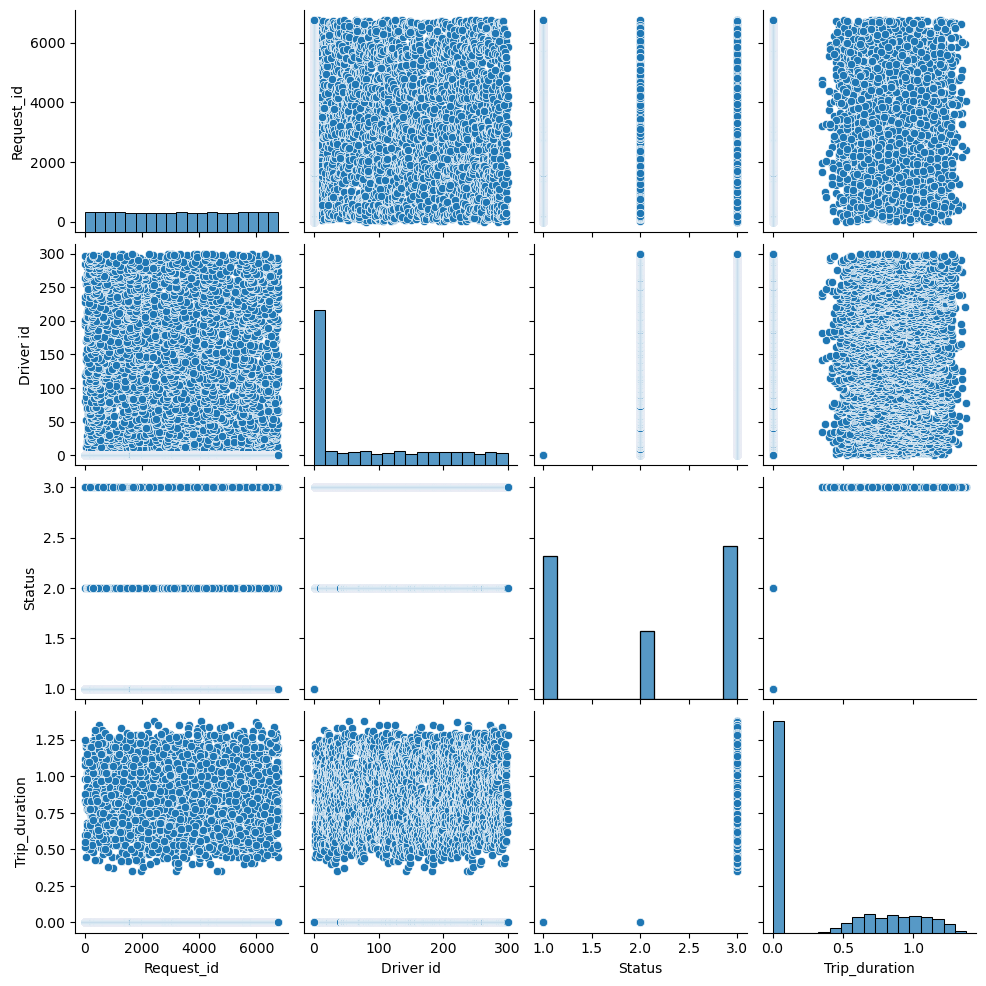

In [185]:
sns.pairplot(df)
plt.show()

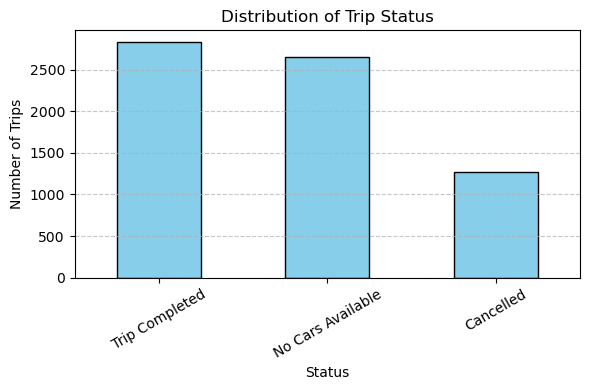

In [186]:
status_labels = {
    3: "Trip Completed",
    2: "Cancelled",
    1: "No Cars Available"
}

# Replace codes with labels for plotting
status_counts = df['Status'].map(status_labels).value_counts()

# Plot
plt.figure(figsize=(6, 4))
status_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Distribution of Trip Status")
plt.xlabel("Status")
plt.ylabel("Number of Trips")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

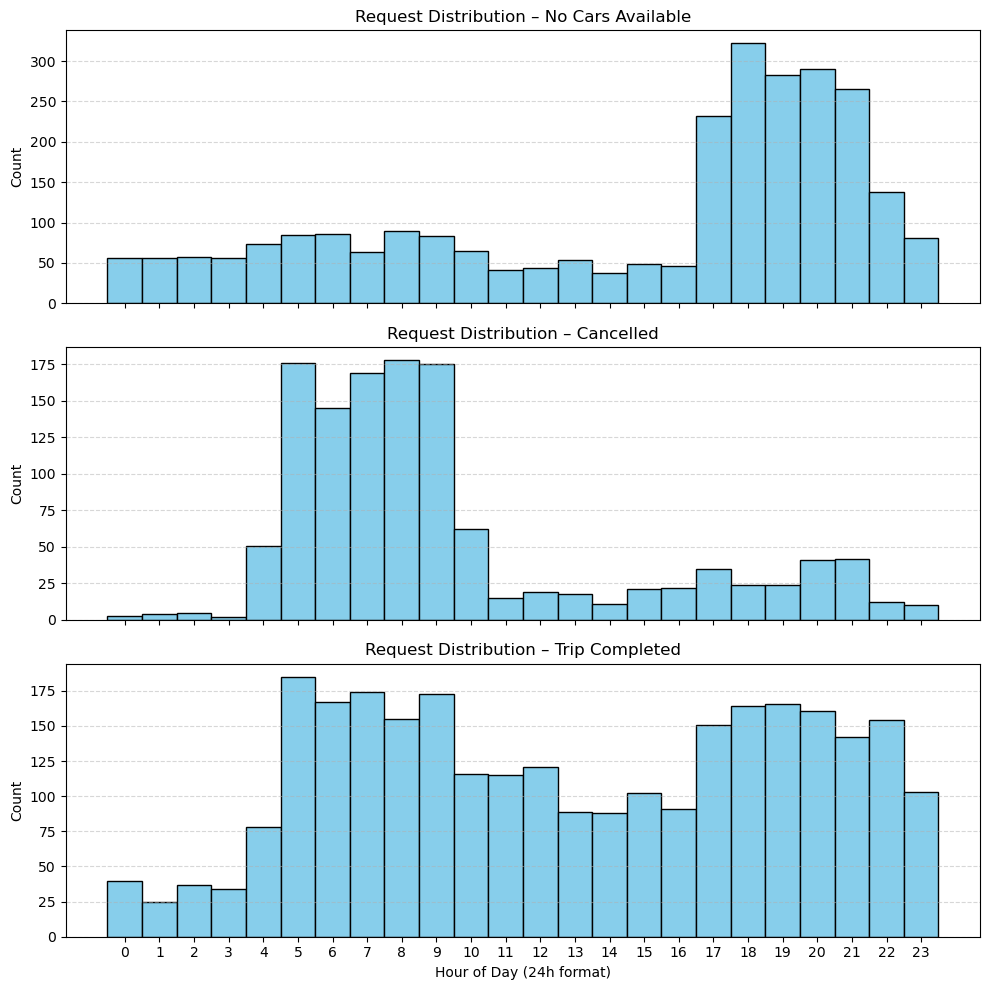

In [187]:
df['Request_timestamp'] = pd.to_datetime(df['Request_timestamp'], format='mixed', dayfirst=True)

# Add hour column
df['Request_hour'] = df['Request_timestamp'].dt.hour

# Status label mapping
status_labels = {
    1: "No Cars Available",
    2: "Cancelled",
    3: "Trip Completed"
}

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)

for i, status_code in enumerate([1, 2, 3]):
    subset = df[df['Status'] == status_code]
    axes[i].hist(subset['Request_hour'], bins=24, range=(0, 24), color='skyblue', edgecolor='black', align='left')
    axes[i].set_title(f"Request Distribution – {status_labels[status_code]}")
    axes[i].set_ylabel("Count")
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# Common x-label
plt.xlabel("Hour of Day (24h format)")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

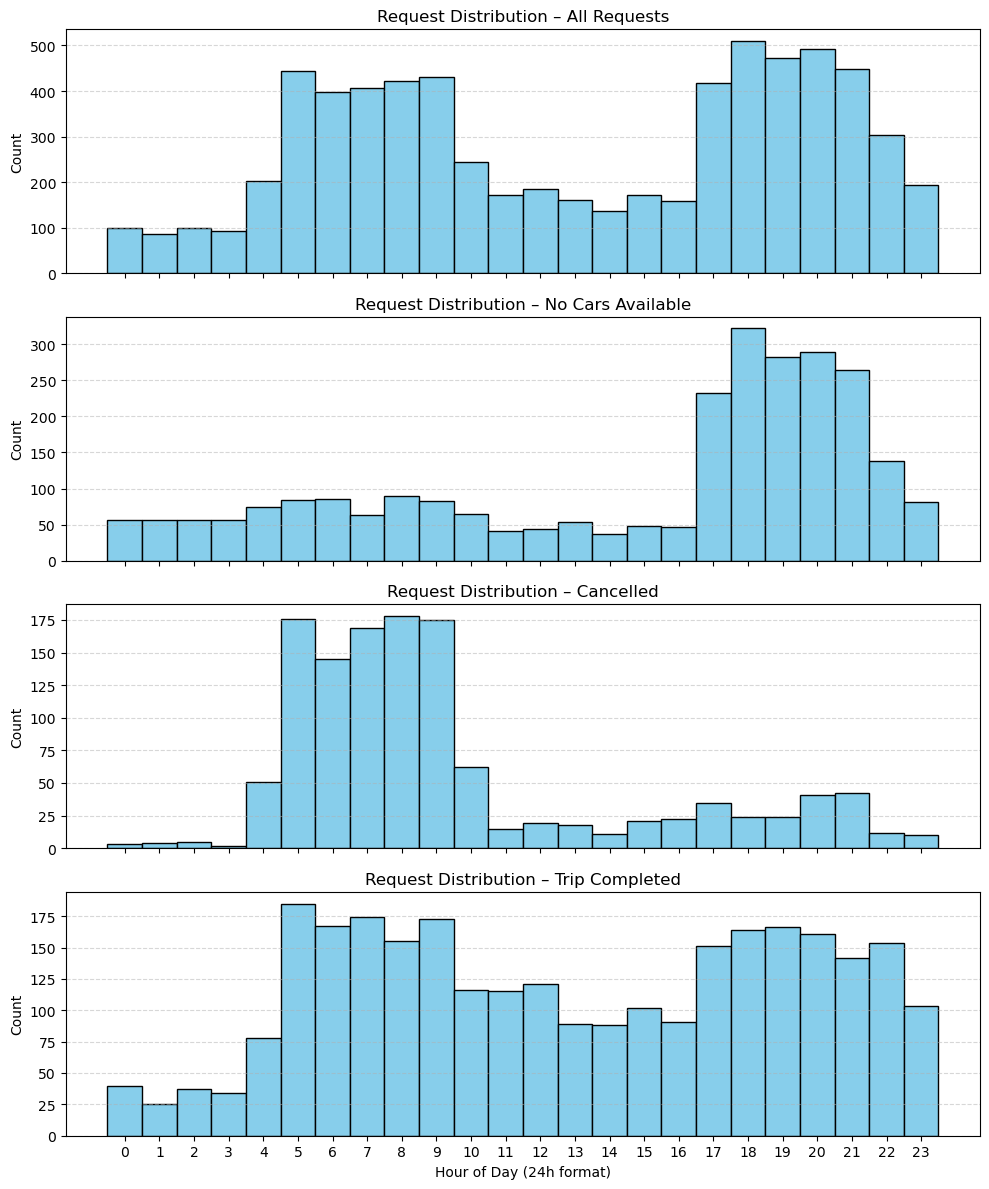

In [188]:
# Extract the hour of request
df['Request_hour'] = df['Request_timestamp'].dt.hour

# Status labels
status_labels = {
    0: "All Requests",
    1: "No Cars Available",
    2: "Cancelled",
    3: "Trip Completed"
}

# Prepare list of status codes, including 0 for all data
status_codes = [0, 1, 2, 3]

# Set up 4 subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12), sharex=True)

for i, status_code in enumerate(status_codes):
    if status_code == 0:
        subset = df
    else:
        subset = df[df['Status'] == status_code]

    axes[i].hist(subset['Request_hour'], bins=24, range=(0, 24), color='skyblue', edgecolor='black', align='left')
    axes[i].set_title(f"Request Distribution – {status_labels[status_code]}")
    axes[i].set_ylabel("Count")
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# Common X label for all
plt.xlabel("Hour of Day (24h format)")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


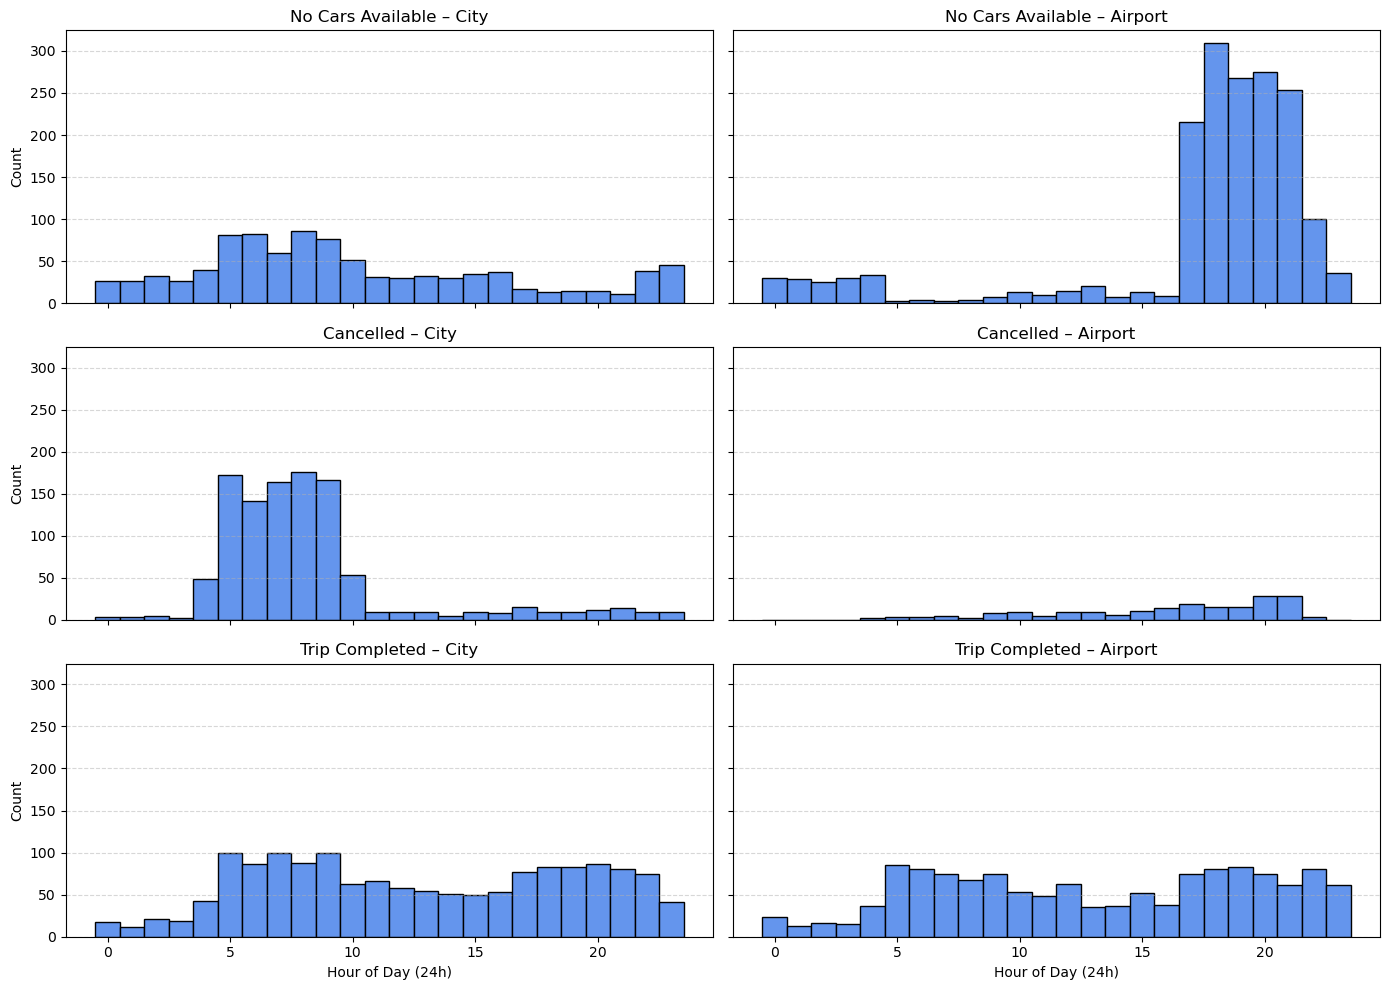

In [189]:
df['Request_timestamp'] = pd.to_datetime(df['Request_timestamp'], format='mixed', dayfirst=True)
df['Request_hour'] = df['Request_timestamp'].dt.hour

# Status and pickup labels
status_labels = {
    1: "No Cars Available",
    2: "Cancelled",
    3: "Trip Completed"
}

pickup_points = ['City', 'Airport']
status_codes = [1, 2, 3]

# Set up 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10), sharex=True, sharey=True)

# Plot
for row, status in enumerate(status_codes):
    for col, pickup in enumerate(pickup_points):
        subset = df[(df['Status'] == status) & (df['Pickup_point'] == pickup)]
        axes[row][col].hist(subset['Request_hour'], bins=24, range=(0, 24),
                            color='cornflowerblue', edgecolor='black', align='left')

        axes[row][col].set_title(f"{status_labels[status]} – {pickup}")
        axes[row][col].grid(axis='y', linestyle='--', alpha=0.5)

# Shared axis labels
for ax in axes[2]:
    ax.set_xlabel("Hour of Day (24h)")
for ax in axes[:, 0]:
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

C:\Users\Legion\AppData\Local\Temp\ipykernel_27164\4177427157.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_Copy, x='Pickup_point', y='Trip_duration', palette='pastel')


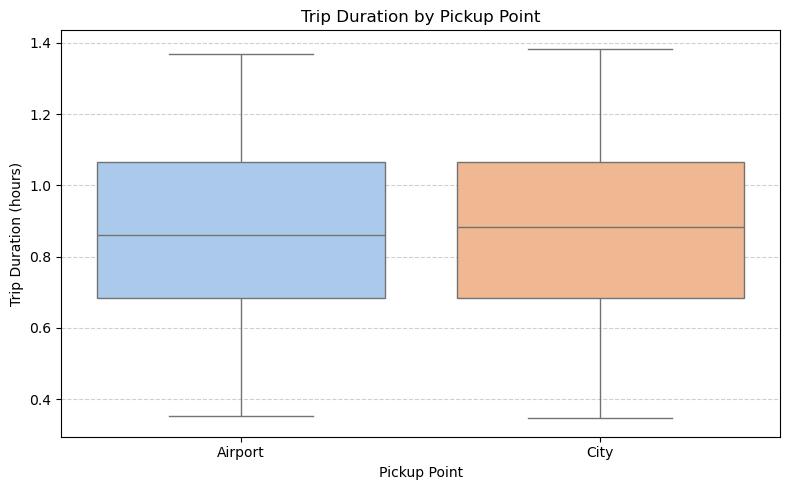

In [190]:
df['Trip_duration'] = (pd.to_datetime(df['Drop_timestamp'], format='mixed', dayfirst=True) -
                       pd.to_datetime(df['Request_timestamp'], format='mixed', dayfirst=True)).dt.total_seconds() / 3600

# Remove rows with missing/negative durations (if any)
df_Copy = df[df['Trip_duration'] > 0]

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_Copy, x='Pickup_point', y='Trip_duration', palette='pastel')

plt.title("Trip Duration by Pickup Point")
plt.ylabel("Trip Duration (hours)")
plt.xlabel("Pickup Point")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [191]:
df.tail(10)

Request_id Pickup_point  Driver id Status   Request_timestamp  \
6735        6737      Airport        0.0      1 2016-07-15 23:39:15   
6736        6744      Airport        0.0      1 2016-07-15 23:42:51   
6737        6740         City        0.0      1 2016-07-15 23:43:54   
6738        6746         City        0.0      1 2016-07-15 23:46:03   
6739        6739         City        0.0      1 2016-07-15 23:46:20   
6740        6745         City        0.0      1 2016-07-15 23:49:03   
6741        6752      Airport        0.0      1 2016-07-15 23:50:05   
6742        6751         City        0.0      1 2016-07-15 23:52:06   
6743        6754         City        0.0      1 2016-07-15 23:54:39   
6744        6753      Airport        0.0      1 2016-07-15 23:55:03   

          Drop_timestamp  Trip_duration  Request_hour  
6735 2016-07-15 23:39:15            0.0            23  
6736 2016-07-15 23:42:51            0.0            23  
6737 2016-07-15 23:43:54            0.0            23  
6738 2016-07-15 23:46:03            0.0            23  
6739 2016-07-15 23:46:20            0.0            23  
6740 2016-07-15 23:49:03            0.0            23  
6741 2016-07-15 23:50:05            0.0            23  
6742 2016-07-15 23:52:06            0.0            23  
6743 2016-07-15 23:54:39            0.0            23  
6744 2016-07-15 23:55:03            0.0            23

In [192]:
# No difference at duration 


C:\Users\Legion\AppData\Local\Temp\ipykernel_27164\4206985406.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Copy['Request_hour'] = df_Copy['Request_timestamp'].dt.hour


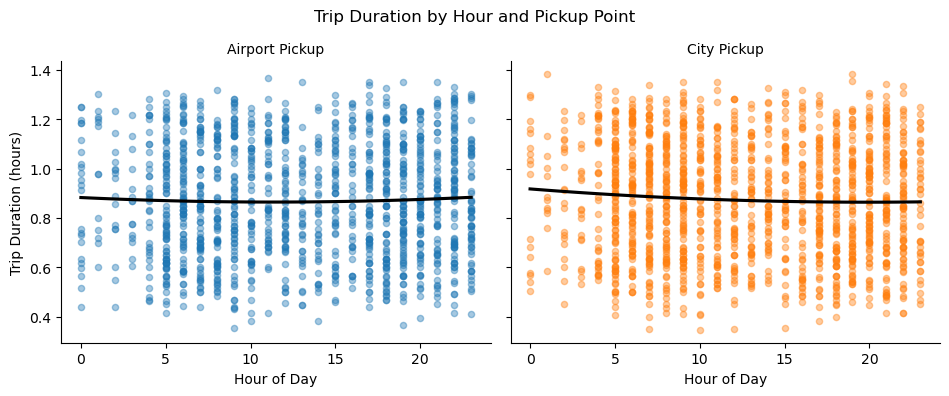

In [193]:
df['Request_timestamp'] = pd.to_datetime(df['Request_timestamp'], format='mixed', dayfirst=True)
df['Drop_timestamp'] = pd.to_datetime(df['Drop_timestamp'], format='mixed', dayfirst=True)
df['Trip_duration'] = (df['Drop_timestamp'] - df['Request_timestamp']).dt.total_seconds() / 3600

# Remove invalid durations
df_Copy = df[df['Trip_duration'] > 0]

# Extract request hour
df_Copy['Request_hour'] = df_Copy['Request_timestamp'].dt.hour

# Create scatter + trend line for each pickup point
g = sns.lmplot(
    data=df_Copy,
    x='Request_hour',
    y='Trip_duration',
    col='Pickup_point',
    hue='Pickup_point',
    height=4,
    aspect=1.2,
    scatter_kws={'alpha': 0.4, 's': 20},
    line_kws={'color': 'black'},
    ci=None,
    order=2  # Optional: trendline with slight curve
)

g.set_axis_labels("Hour of Day", "Trip Duration (hours)")
g.set_titles("{col_name} Pickup")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Trip Duration by Hour and Pickup Point")

plt.show()

In [194]:
df.tail(10)

Request_id Pickup_point  Driver id Status   Request_timestamp  \
6735        6737      Airport        0.0      1 2016-07-15 23:39:15   
6736        6744      Airport        0.0      1 2016-07-15 23:42:51   
6737        6740         City        0.0      1 2016-07-15 23:43:54   
6738        6746         City        0.0      1 2016-07-15 23:46:03   
6739        6739         City        0.0      1 2016-07-15 23:46:20   
6740        6745         City        0.0      1 2016-07-15 23:49:03   
6741        6752      Airport        0.0      1 2016-07-15 23:50:05   
6742        6751         City        0.0      1 2016-07-15 23:52:06   
6743        6754         City        0.0      1 2016-07-15 23:54:39   
6744        6753      Airport        0.0      1 2016-07-15 23:55:03   

          Drop_timestamp  Trip_duration  Request_hour  
6735 2016-07-15 23:39:15            0.0            23  
6736 2016-07-15 23:42:51            0.0            23  
6737 2016-07-15 23:43:54            0.0            23  
6738 2016-07-15 23:46:03            0.0            23  
6739 2016-07-15 23:46:20            0.0            23  
6740 2016-07-15 23:49:03            0.0            23  
6741 2016-07-15 23:50:05            0.0            23  
6742 2016-07-15 23:52:06            0.0            23  
6743 2016-07-15 23:54:39            0.0            23  
6744 2016-07-15 23:55:03            0.0            23

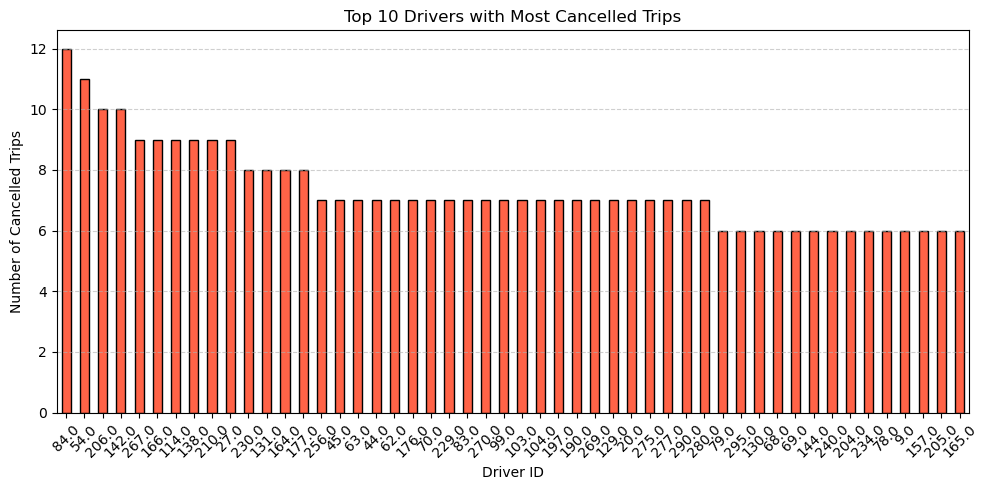

In [ ]:
cancelled = df[df['Status'] == 2]

# Count cancellations per driver
cancelled_counts = cancelled['Driver id'].value_counts().head(50)  # Top 10 drivers

# Plot
plt.figure(figsize=(10, 5))
cancelled_counts.plot(kind='bar', color='tomato', edgecolor='black')

plt.title("Top 10 Drivers with Most Cancelled Trips")
plt.xlabel("Driver ID")
plt.ylabel("Number of Cancelled Trips")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [198]:
df.tail(10)

Request_id Pickup_point  Driver id Status   Request_timestamp  \
6735        6737      Airport        0.0      1 2016-07-15 23:39:15   
6736        6744      Airport        0.0      1 2016-07-15 23:42:51   
6737        6740         City        0.0      1 2016-07-15 23:43:54   
6738        6746         City        0.0      1 2016-07-15 23:46:03   
6739        6739         City        0.0      1 2016-07-15 23:46:20   
6740        6745         City        0.0      1 2016-07-15 23:49:03   
6741        6752      Airport        0.0      1 2016-07-15 23:50:05   
6742        6751         City        0.0      1 2016-07-15 23:52:06   
6743        6754         City        0.0      1 2016-07-15 23:54:39   
6744        6753      Airport        0.0      1 2016-07-15 23:55:03   

          Drop_timestamp  Trip_duration  Request_hour  
6735 2016-07-15 23:39:15            0.0            23  
6736 2016-07-15 23:42:51            0.0            23  
6737 2016-07-15 23:43:54            0.0            23  
6738 2016-07-15 23:46:03            0.0            23  
6739 2016-07-15 23:46:20            0.0            23  
6740 2016-07-15 23:49:03            0.0            23  
6741 2016-07-15 23:50:05            0.0            23  
6742 2016-07-15 23:52:06            0.0            23  
6743 2016-07-15 23:54:39            0.0            23  
6744 2016-07-15 23:55:03            0.0            23

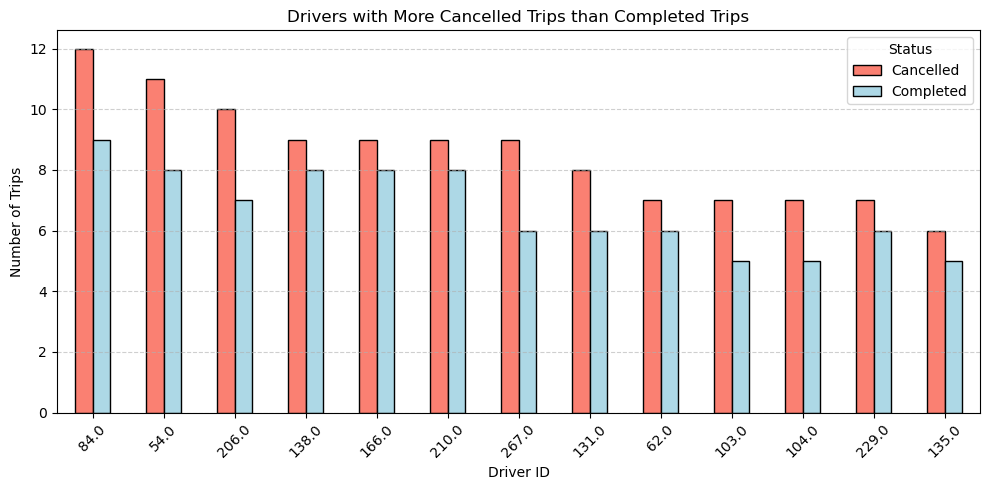

In [206]:
filtered_df = df[df['Status'].isin([2, 3])]

# Group by driver and status
driver_status_counts = filtered_df.groupby(['Driver id', 'Status']).size().unstack(fill_value=0)

# Rename safely
driver_status_counts = driver_status_counts.rename(columns={2: 'Cancelled', 3: 'Completed'})

# Fill missing columns if one doesn't exist
if 'Cancelled' not in driver_status_counts.columns:
    driver_status_counts['Cancelled'] = 0
if 'Completed' not in driver_status_counts.columns:
    driver_status_counts['Completed'] = 0

# Filter drivers where Cancelled > Completed
drivers_more_cancelled = driver_status_counts[driver_status_counts['Cancelled'] > driver_status_counts['Completed']]

# Sort and plot top 10
drivers_more_cancelled = drivers_more_cancelled.sort_values(by='Cancelled', ascending=False)

# Plot
drivers_more_cancelled.plot(kind='bar', figsize=(10, 5), color=['salmon', 'lightblue'], edgecolor='black')

plt.title("Drivers with More Cancelled Trips than Completed Trips")
plt.xlabel("Driver ID")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Status     Cancelled  Completed  Cancel_vs_Complete_Diff
Driver id                                               
54.0              11          8                        3
62.0               7          6                        1
84.0              12          9                        3
103.0              7          5                        2
104.0              7          5                        2


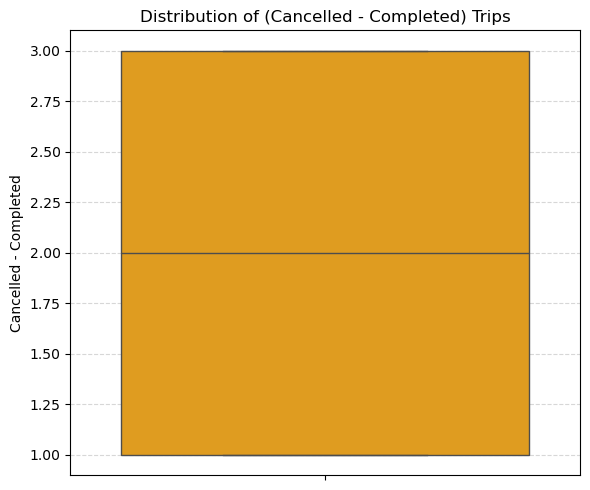

In [208]:
filtered_df = df[df['Status'].isin([2, 3])]

# Group and count per driver and status
driver_status_counts = filtered_df.groupby(['Driver id', 'Status']).size().unstack(fill_value=0)

# Rename columns safely
driver_status_counts = driver_status_counts.rename(columns={2: 'Cancelled', 3: 'Completed'})
if 'Cancelled' not in driver_status_counts.columns:
    driver_status_counts['Cancelled'] = 0
if 'Completed' not in driver_status_counts.columns:
    driver_status_counts['Completed'] = 0

# Filter drivers with more Cancelled than Completed
drivers_more_cancelled = driver_status_counts[driver_status_counts['Cancelled'] > driver_status_counts['Completed']].copy()

# Add column: difference between Cancelled and Completed
drivers_more_cancelled['Cancel_vs_Complete_Diff'] = (
    drivers_more_cancelled['Cancelled'] - drivers_more_cancelled['Completed']
)

# Show head (optional)
print(drivers_more_cancelled[['Cancelled', 'Completed', 'Cancel_vs_Complete_Diff']].head())

# Boxplot of the difference
plt.figure(figsize=(6, 5))
sns.boxplot(y=drivers_more_cancelled['Cancel_vs_Complete_Diff'], color='orange')

plt.title("Distribution of (Cancelled - Completed) Trips")
plt.ylabel("Cancelled - Completed")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

*Increase cars from 17 till 23 in Airport*

*Increase cars from 04 till 10 in city*

*Add violations/or increase costs on drivers with Cancelled trips > completed*

*Add violations/or increase costs on customer with Cancelled trips > completed*